# Similarity Metrics


Let $D = {(x_1,y_1), (x_2,y_2)...(x_i,y_i)...(x_N,y_N)}$ be a dataset consisting of two variables (X, Y) and N rows. 

One way to examine the collective behavior of X and Y is to examine their similarity quantified with help of suitably defined metric. 

Among several such metrics, an interesting one is the **Cosine Similarity**, which tends to use angle of divergence between vectors $\vec{X} = \{x_1,x_2... x_i... x_N\}$ and $\vec{Y}=\{y_1,y_2... y_i... y_N\}$ as a measure of how similar they are.

Mathematically, Cosine Similarity is defined as: 

\begin{align} 
cosine (X, Y) &= \frac{ \sum_i x_i y_i }{ 
\sqrt{\sum_i x_i^2} \sqrt{ \sum_i y_i^2 } }
\end{align}

- The cosine function attains maximum value of 1 for when angle between X and Y is 0 degree (Collinear vectors), and it is at minimum value of 0 when the angle is 90 degree (Orthogonal Vectors). The collinearity is interpretted as a high degree of similarity while orthogonality is interpretted as opposite.

Another commonly used measure is **Pearson Correlation Coefficient**, which is defined as:

\begin{align} 
corr(X,Y) &= \frac{ \sum_i (x_i-\bar{x}) (y_i-\bar{y}) }{ 
\sqrt{\sum_i (x_i-\bar{x})^2} \sqrt{ \sum_i (y_i-\bar{y})^2 } } 
\end{align}, where $\bar{x}$ and $\bar{y}$ is the mean for X and Y vectors.

- Note that Pearson Coeffcient between X and Y can also be interpretted as Cosine similarity between vectors $(X-\bar{X})$ and $(Y-\bar{Y})$ of departures from mean. When both the departure vectors are collinear - a shift in X away from mean implies a similar shift in Y. Hence this metric has traditionally been used as a measure of correlation between the variables.

Summarizing above discussion:

1. Cosine Similarity and Pearson Correlation can be used to measure similarity of vectors.
2. Pearson Correlation Coefficient is a "centered" cosine similarity between $X-\bar{X}$ and $Y-\bar{Y}$ vectors.

Below we will show how to implement these measures by implementing the formulae shown above.


### Simulate Data for Demonstration

In [1]:
import numpy as np
import random

#Define vector X
x = [0.001*x for x in range(1,101)]

#Define vector Y
y = [xi+random.uniform(0.1,0.15) for xi in x]

#Define vector Z
z = [random.uniform(0,1) for xi in x]

#convert to numpy arrays 
x = np.array(x)
y = np.array(y)
z = np.array(z)

Above, we have defined y so that its strongly correlated with x. Lets begin by visualizing the dataset:

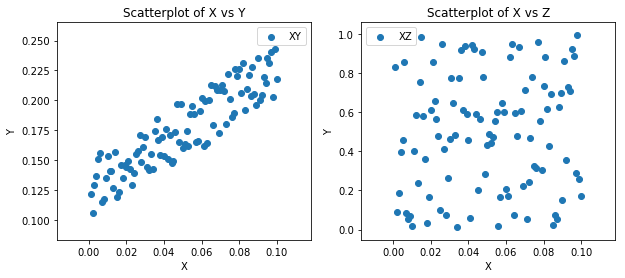

In [2]:
import matplotlib.pyplot as plt

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.scatter(x,y,label='XY')
ax2.scatter(x,z,label='XZ')
ax1.set_title("Scatterplot of X vs Y")
ax2.set_title("Scatterplot of X vs Z")
for ax in [ax1, ax2]:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

plt.show()

### Calculating  Correlation coefficient

Below we define a function that takes two array like parameters x and y and returns Pearson correlation coeff.

In [3]:
import math
def pearson_coff(x, y):
    """
    X = 1d Array = [x1,x2,x3...]
    Y = 1d Array = [y1,y2,y3...]
    """
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    dot = 0.0
    norm1 = 0.0
    norm2 = 0.0
    for i in range(len(x)):
        dot += (x[i]-mean_x)* (y[i]-mean_y)
        norm1 += (x[i]-mean_x)**2
        norm2 += (y[i]-mean_y)**2
    return round(dot/(math.sqrt(norm1)*math.sqrt(norm2)),5)  


print ("Pearson Correlation Coefficient (X,Y): ",pearson_coff(x,y))
print ("Pearson Correlation Coefficient (X,Z): ",pearson_coff(x,z))

Pearson Correlation Coefficient (X,Y):  0.90143
Pearson Correlation Coefficient (X,Z):  0.10841


### Calculating Cosine Similarity
Below we define a function that takes two array like parameters x and y and returns Cosine Similarity.

In [4]:
def cos_sim(x, y):
    """
    X = 1d Array = [x1,x2,x3...]
    Y = 1d Array = [y1,y2,y3...]
    """    
    dot = 0.0
    norm1 = 0.0
    norm2 = 0.0
    for i in range(len(x)):
        dot = dot + (x[i]*y[i])
        norm1 = norm1 + (x[i]*x[i])
        norm2 = norm2 + (y[i]*y[i])
    return dot/(math.sqrt(norm1)*math.sqrt(norm2))  

print ("Cosine (X,Y): ",cos_sim(x,y))
print ("Cosine (X,Z): ",cos_sim(x,z))

Cosine (X,Y):  0.936506825133
Cosine (X,Z):  0.772590469145


### Pearson Coefficient as Centralized Cosine

If we normalize x and y vectors with their respective means and get the cosine similarity between resulting vectors, it will come same (computationally close) to the correlation coefficient.

In [5]:
norm_x = x - np.mean(x)
norm_y = y - np.mean(y)
norm_z = z - np.mean(z)
print ("Cosine Similarity (X, Y) of distances from mean: " ,cos_sim(norm_x, norm_y))
print ("Cosine Similarity (X, Z) of distances from mean: " ,cos_sim(norm_x, norm_z))

Cosine Similarity (X, Y) of distances from mean:  0.901431165029
Cosine Similarity (X, Z) of distances from mean:  0.108411284771


### Pearson Correlation and Cosine Under Scaling and Shifting

Pearson correlation and cosine similarity are **invariant to scaling**, i.e. multiplying all elements by a nonzero constant.

In [6]:
print("Cosine Similarity  (X,Y) : ",cos_sim(x,y))
print("Cosine Similarity (5X,5Y): " ,cos_sim(x*5,y*3))

print("\nPearson Coefficient (X,Y) : ",pearson_coff(x,y))
print("Pearson Coefficient (5X,5Y) : ",pearson_coff(5*x,5*y))

Cosine Similarity  (X,Y) :  0.936506825133
Cosine Similarity (5X,5Y):  0.936506825133

Pearson Coefficient (X,Y) :  0.90143
Pearson Coefficient (5X,5Y) :  0.90143


But **Pearson correlation is also invariant to adding any constant to all elements**, the reason being it's definition where the means are subtracted out from vectors.

In [7]:
print("Cosine Similarity  (X,Y) : ",cos_sim(x,y))
print("Cosine Similarity (5+X,5+Y): " ,cos_sim(x+5,y+3))

print("\nPearson Coefficient (X,Y) : ",pearson_coff(x,y))
print("Pearson Coefficient (5+X,5+Y) : ",pearson_coff(x+5,y+3))

Cosine Similarity  (X,Y) :  0.936506825133
Cosine Similarity (5+X,5+Y):  0.999982336871

Pearson Coefficient (X,Y) :  0.90143
Pearson Coefficient (5+X,5+Y) :  0.90143


**Note that while Pearson Coefficient is invariant both under scaling and shifting, the Cosine is invariant under scaling only**. 

## Conclusions:

Correlation is same as the cosine similarity between centered versions of X and Y, and is bounded between -1 and 1. 

Cosine similarity in not about vector angles only, but it is equivalent to correlation for the vectors of samples. 

Unlike the cosine similarity, the correlation coefficient is invariant to both scale and location changes of x and y. 